# FRESH:COM



## Objective and Scope 

The energy community model FRESH:COM is developed within the [Horizon 2020 project openENTRANCE](https://openentrance.eu). 
The model is used for quantitative analyses as part of case study 2 - Behaviour of communities of actors.

### Expected results 
- Optimal design of the renewable technology portfolio for the community
- Time series of total and shared hourly local generation, storage operation, load, and purchases needed from the public grid 
    - For each community actor
    - For the community as a whole
- Revenues streams of community actors and external supplier
- Determination of the net present value of investment and operational results up to 15 years (forth-coming)
- Analyses for Austria and 4 European ‘reference countries’ (forth-coming)
- Quantitative upscaling of the short- and long-term local energy community potential is conducted for Europe as a whole (forth-coming)


## Nomenclature 
### Input data
Variable | Description      | Unit 
:--|:---------|:-----------:
$q^{PV}_{i,t}$    | PV generation of prosumer $i$                          | kWh
$q^{load}_{i,t}$  | Demand of prosumer $i$                                 | kWh
$SoC_{i}^{max}$   | Maximum capacity of prosumer $i$'s battery             | kWh
$q^{B_{max}}_{i}$ | Maximum (dis)charging power of prosumer $i$'s battery  | kW
$\eta^{B}$        | Efficiency of the batteries}                           | 
$w_{j}$           | Prosumer $j$'s weighting factor for marginal emissions | EUR/tCO2
$wtp_{i,j,t}$     | Willingness-to-pay of prosumer $j$                     | EUR/kWh
$p_{t}^{G_{in}}$  | Average spot market electricity price                  | EUR/kWh
$p_{t}^{G_{out}}$ | Retailer's electricity price                           | EUR/kWh
$e_{t}$           | Marginal emissions from the grid                       | tCO2/kWh
$\epsilon$        | Tolerance of the community                             | 
$\alpha_{i}$      | Preference for avoiding emissions or costs when choosing a new member | 

### Output data
Variable | Description      | Unit 
:--|:---------|:-----------:
$q^{G_{in}}_{i,t}$  | Purchase of prosumer $i$ from the grid     | kWh
$q^{G_{out}}_{i,t}$ | Sales from prosumer $i$ to the grid        | kWh
$q^{share}_{i,j,t}$ | Purchase of prosumer $j$ from prosumer $i$ | kWh
$q^{B_{in}}_{i,t}$  | Charging of prosumer $i$'s battery         | kWh
$q^{B_{out}}_{i,t}$ | Discharging of prosumer $i$'s battery      | kWh
$SoC_{i,t}$         | State of charge of prosumer $i$'s battery  | kWh

## Data and Packages

In [1]:
# import packages
import numpy as np
import pandas as pd
from pyomo.environ import *
import matplotlib.pyplot as plt
import seaborn as sns
#import pyam

%matplotlib inline

### Input data for energy communities

For details on the data format according to openENTRANCE see: https://github.com/openENTRANCE/nomenclature.



In [2]:
# read data sheets and save as pandas dataframes
# Prosumer data
load = pd.read_excel('Input_data_community_small_example.xlsx', 
                     sheet_name='Demand', 
                     header=0, 
                     index_col='time')
PV = pd.read_excel('Input_data_community_small_example.xlsx', 
                   sheet_name='PV', 
                   header=0, 
                   index_col='time')

# Grid parameter
emissions = pd.read_excel('Input_data_community_small_example.xlsx', 
                          sheet_name='Marginal emissions', 
                          header=0, 
                          index_col='time')
prices = pd.read_excel('Input_data_community_small_example.xlsx', 
                       sheet_name='Prices', 
                       header=0)


In [3]:
load

,model,scenario,region,variable,unit,Prosumer 1,Prosumer 2,Prosumer 3,Prosumer 4,Prosumer 5,Prosumer 6
time,,,,,,,,,,,
2019-01-01 00:00+01:00,FRESH:COM v1.0,NaN,Austria,Final Energy|Residential and Commercial|Electr...,kWh,0.560675,0.190448,0.339625,0.295211,0.287922,0.551296
2019-01-01 01:00+01:00,FRESH:COM v1.0,NaN,Austria,Final Energy|Residential and Commercial|Electr...,kWh,0.547131,0.184950,0.213261,0.249684,0.260749,0.603248
2019-01-01 02:00+01:00,FRESH:COM v1.0,NaN,Austria,Final Energy|Residential and Commercial|Electr...,kWh,0.511453,0.167354,0.206496,0.296579,0.274643,0.584614
2019-01-01 03:00+01:00,FRESH:COM v1.0,NaN,Austria,Final Energy|Residential and Commercial|Electr...,kWh,0.458003,0.157157,0.214995,0.323098,1.056630,0.587524
2019-01-01 04:00+01:00,FRESH:COM v1.0,NaN,Austria,Final Energy|Residential and Commercial|Electr...,kWh,0.437814,0.180155,0.243081,0.271542,0.303982,0.528587
...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00+01:00,FRESH:COM v1.0,NaN,Austria,Final Energy|Residential and Commercial|Electr...,kWh,1.024138,0.220011,0.876033,1.168075,0.919636,2.866268
2019-12-31 20:00+01:00,FRESH:COM v1.0,NaN,Austria,Final Energy|Residential and Commercial|Electr...,kWh,0.938470,0.357786,0.822017,1.113036,0.615786,1.448335
2019-12-31 21:00+01:00,FRESH:COM v1.0,NaN,Austria,Final Energy|Residential and Commercial|Electr...,kWh,0.782867,0.627135,0.806216,1.380487,0.449766,1.913151


In [4]:
# filter time steps to desired range
# for a day use string e.g. '2019-01-01' for January 1st, 
# for a month e.g. '2019-01' for January, 
# for the whole year '2019'
time_steps = [s for s in list(load.index) if "2019" in s]
index_time = list(range(len(time_steps)))

In [5]:
time_steps

['2019-01-01 00:00+01:00',
 '2019-01-01 01:00+01:00',
 '2019-01-01 02:00+01:00',
 '2019-01-01 03:00+01:00',
 '2019-01-01 04:00+01:00',
 '2019-01-01 05:00+01:00',
 '2019-01-01 06:00+01:00',
 '2019-01-01 07:00+01:00',
 '2019-01-01 08:00+01:00',
 '2019-01-01 09:00+01:00',
 '2019-01-01 10:00+01:00',
 '2019-01-01 11:00+01:00',
 '2019-01-01 12:00+01:00',
 '2019-01-01 13:00+01:00',
 '2019-01-01 14:00+01:00',
 '2019-01-01 15:00+01:00',
 '2019-01-01 16:00+01:00',
 '2019-01-01 17:00+01:00',
 '2019-01-01 18:00+01:00',
 '2019-01-01 19:00+01:00',
 '2019-01-01 20:00+01:00',
 '2019-01-01 21:00+01:00',
 '2019-01-01 22:00+01:00',
 '2019-01-01 23:00+01:00',
 '2019-01-02 00:00+01:00',
 '2019-01-02 01:00+01:00',
 '2019-01-02 02:00+01:00',
 '2019-01-02 03:00+01:00',
 '2019-01-02 04:00+01:00',
 '2019-01-02 05:00+01:00',
 '2019-01-02 06:00+01:00',
 '2019-01-02 07:00+01:00',
 '2019-01-02 08:00+01:00',
 '2019-01-02 09:00+01:00',
 '2019-01-02 10:00+01:00',
 '2019-01-02 11:00+01:00',
 '2019-01-02 12:00+01:00',
 

In [6]:
# define a list with the prosumer names e.g. 'Prosumer 1', 'Household 1', etc. according to data sheet
prosumer = [s for s in list(load) if s.startswith("Prosumer")]
prosumer

['Prosumer 1',
 'Prosumer 2',
 'Prosumer 3',
 'Prosumer 4',
 'Prosumer 5',
 'Prosumer 6']

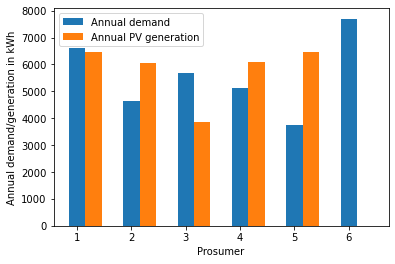

In [9]:
annual_load = [sum(load[s]) for s in prosumer] 
annual_PV = [sum(PV[s]) for s in prosumer]
barWidth = 0.3
r1 = np.arange(len(annual_load))
r2 = [x + barWidth for x in r1]
plt.bar(r1, annual_load, width = barWidth)
plt.bar(r2, annual_PV, width = barWidth)
plt.xticks(r1, np.arange(1,len(prosumer)+1))
plt.xlabel('Prosumer')
plt.ylabel('Annual demand/generation in kWh')
plt.legend(['Annual demand', 'Annual PV generation'])
plt.show()

### Prices 

In [10]:
a = prices[prices.variable == 'Price|Final Energy|Residential|Electricity'].index[0]
if "/MWh" in prices.unit[a]:
    unit_conv = 1000
elif "/kWh" in prices.unit[a]:
    unit_conv = 1
p_grid_in = prices.loc[a][2019]/unit_conv


In [11]:
a = prices[prices.variable == 'Price|Secondary Energy|Electricity'].index[0]
if "/MWh" in prices.unit[a]:
    unit_conv = 1000
elif "/kWh" in prices.unit[a]:
    unit_conv = 1
p_grid_out = prices.loc[a][2019]/unit_conv

In [12]:
print("Household electricity price p_grid_in is "+str(p_grid_in)+" EUR/kWh.\n")
print("Average spot market price p_grid_out is "+str(p_grid_out)+" EUR/kWh.")

Household electricity price p_grid_in is 0.2 EUR/kWh.

Average spot market price p_grid_out is 0.040159999999999994 EUR/kWh.


In [13]:
# load static prosumer parameter
# remark: not yet in IAMC format
prosumer_data = pd.read_excel('Input_data_community_small_example.xlsx', 
                              sheet_name='Prosumer data', 
                              header=0, 
                              index_col='Data')

In [14]:
# show table / pandas dataframe of prosumer parameter
prosumer_data

,Prosumer 1,Prosumer 2,Prosumer 3,Prosumer 4,Prosumer 5,Prosumer 6
Data,,,,,,
q_bat_max,0,1.0,0,1,0.0,0
SoC_min,0,0.0,0,0,0.0,0
SoC_max,0,4.0,0,5,0.0,0
SoC_init,0,0.0,0,0,0.0,0
w,10,70.0,100,50,20.0,80
alpha,1,0.5,0,1,0.5,0


In [15]:
eta_battery = 0.9

In [16]:
distances = pd.read_excel('Input_data_community_small_example.xlsx', 
                              sheet_name='Distances', 
                              header=0, 
                              index_col='Prosumer')

## Pyomo Optimization Model


## Sets

$N$ ... number of prosumers of original community

$n$ ... number of potential new prosumers (candidates)

$n_{max}, n_{min}$ ... number of maxiumum/minimum number of new prosumers

## Decision variables

$q_{i,t}^{G_{in}},q_{i,t}^{G_{out}},q_{i,j,t}^{share},q_{i,t}^{B_{in}},q_{i,t}^{B_{out}},SoC_{i,t}\in\mathbb{R}^{+}$

$b_{i}\in\{0,1\}$ ... for $i\in n$

$b_{i}=1$ ... for $i\in N$

## Objective function

$\underset{\substack{\{q_{i,t}^{G_{in}},q_{i,t}^{G_{out}},q_{i,j,t}^{share},q_{i,t}^{B_{in}},q_{i,t}^{B_{out}},SoC_{i,t},b_{i}\}}}{\text{max}} \sum_{t\in\mathcal{T},i\in\mathcal{I}}^{}p_t^{G_{out}}q_{i,t}^{G_{out}}-\sum_{t\in\mathcal{T},i\in\mathcal{I}}^{}p_t^{G_{in}}q_{i,t}^{G_{in}}+\sum_{t\in\mathcal{T},i,j\in\mathcal{I}}^{}wtp_{i,j,t}q_{i,j,t}^{share}$

## Constraints

$b_{i}q_{i,t}^{load}=q_{i,t}^{G_{in}}+q_{i,t}^{B_{out}}+\sum_{j\in\mathcal{I}}^{}q_{j,i,t}^{share}$

$b_{i}q_{i,t}^{PV}=q_{i,t}^{G_{out}}+q_{i,t}^{B_{in}}+\sum_{j\in\mathcal{I}}^{}q_{i,j,t}^{share}$

$SoC_{i,t}=SoC_{i,t-1}+q_{i,t}^{B_{in}}\cdot\eta^B-q_{i,t}^{B_{out}}/\eta^B$

$SoC_{i}^{min}\leq SoC_{i,t}\leq b_{i}SoC_{i}^{max}$

$q_{i,t}^{B_{in}},q_{i,t}^{B_{out}}\leq b_{i}q_{i}^{B_{max}}$

$q_{i,t}^{G_{in}},q_{i,t}^{G_{out}},q_{i,j,t}^{share},q_{i,t}^{B_{in}},q_{i,t}^{B_{out}},SoC_{i,t}\geq0$

### Additional (optional) constrains 

$\sum_{i}^{}b_{i} >= N+n_{min}$

$\sum_{i}^{}b_{i} <= N+n_{max}$

## Check results
$\alpha_i \Delta_{Costs,i}+ (1-\alpha_i)\Delta_{Emissions,i} \leq \epsilon$


In [17]:
N = 4 # number of 'old' prosumers
n = 2 # number of 'new' prosumers
#prosumer_old = prosumer[0:N] 
#prosumer_new = prosumer[N:N+n]
prosumer_old = (['Prosumer 1','Prosumer 3','Prosumer 5','Prosumer 6'])


In [18]:
# deactivate BESS
#for i in prosumer:
#    prosumer_data.loc['SoC_max',i] = 0
#    prosumer_data.loc['q_bat_max',i] = 0

## Solve optimization problem for old community and define benchmarks

... as LP

In [19]:
# Define model as concrete model
model = ConcreteModel()

#Define optimization variables 
model.q_share = Var(time_steps, prosumer_old, prosumer_old, within = NonNegativeReals)
model.q_grid_in = Var(time_steps, prosumer_old, within = NonNegativeReals)
model.q_grid_out = Var(time_steps, prosumer_old, within = NonNegativeReals)
model.q_bat_in = Var(time_steps, prosumer_old, within = NonNegativeReals)
model.q_bat_out = Var(time_steps, prosumer_old, within = NonNegativeReals)
model.SoC = Var(time_steps, prosumer_old, within = NonNegativeReals)

In [20]:
# Define constraints
def load_constraint_rule(model, i, t):    
    return model.q_grid_in[t,i] + model.q_bat_out[t,i] + sum(model.q_share[t,j,i] for j in prosumer_old) == load.loc[t,i]
model.load_con = Constraint(prosumer_old, time_steps, rule = load_constraint_rule)

def PV_constraint_rule(model, i, t):    
    return model.q_grid_out[t,i] + model.q_bat_in[t,i] + sum(model.q_share[t,i,j] for j in prosumer_old) == PV.loc[t,i]
model.PV_con = Constraint(prosumer_old, time_steps, rule = PV_constraint_rule)

def SoC_min_constraint_rule(model, i, t):
    return model.SoC[t,i] >= prosumer_data.loc['SoC_min'][i]
model.SoC_min_con = Constraint(prosumer_old, time_steps, rule = SoC_min_constraint_rule)

def SoC_max_constraint_rule(model, i, t):
    return model.SoC[t,i] <= prosumer_data.loc['SoC_max'][i]
model.SoC_max_con = Constraint(prosumer_old, time_steps, rule = SoC_max_constraint_rule)

def q_bat_in_constraint_rule(model, i, t):
    return model.q_bat_in[t,i] <= prosumer_data.loc['q_bat_max'][i]
model.q_bat_in_con = Constraint(prosumer_old, time_steps, rule = q_bat_in_constraint_rule)

def q_bat_out_constraint_rule(model, i, t):
    return model.q_bat_out[t,i] <= prosumer_data.loc['q_bat_max'][i]
model.q_bat_out_con = Constraint(prosumer_old, time_steps, rule = q_bat_out_constraint_rule)

def SoC_constraint_rule(model, i, t):
    if t == 0:
        return model.SoC[time_steps[t],i] == prosumer_data.loc['SoC_init'][i] + model.q_bat_in[time_steps[t],i]*eta_battery - model.q_bat_out[time_steps[t],i]/eta_battery
    elif t > 0:
        return model.SoC[time_steps[t],i] == model.SoC[time_steps[t-1],i] + model.q_bat_in[time_steps[t],i]*eta_battery - model.q_bat_out[time_steps[t],i]/eta_battery
model.SoC_con = Constraint(prosumer_old, index_time, rule = SoC_constraint_rule)

In [21]:
# Objective function
community_welfare = {new_list: [] for new_list in prosumer_old}
prosumer_welfare = {new_list: [] for new_list in prosumer_old}
prosumer_welfare2 = {new_list: [] for new_list in prosumer_old}


for i in prosumer_old:
    community_welfare[i] = sum(-p_grid_in*model.q_grid_in[t,i]+p_grid_out*model.q_grid_out[t,i] for t in time_steps)
    prosumer_welfare[i] = sum((p_grid_in + (prosumer_data.loc['w',j] - distances.loc[i,j])*emissions.Emissions.loc[t]/1000000)*model.q_share[t,i,j] for j in prosumer_old for t in time_steps)
    prosumer_welfare2[i] = sum((p_grid_in + (prosumer_data.loc['w',i] - distances.loc[j,i])*emissions.Emissions.loc[t]/1000000)*model.q_share[t,j,i] for j in prosumer_old for t in time_steps)

# 1. prosumer i sells to prosumer j
# 2. prosumer i buys from prosumer j

In [22]:
model.obj = Objective(
    expr = sum(community_welfare[i] + prosumer_welfare[i] for i in prosumer_old), 
    sense = maximize)

opt = SolverFactory('gurobi')
opt_success = opt.solve(model)

In [23]:
# Evaluate the results
social_welfare_old = value(model.obj)

q_share_total = pd.DataFrame(index=prosumer_old)
for j in prosumer_old:
    a = []
    for i in prosumer_old:
        a.append(value(sum(model.q_share[t,i,j] for t in time_steps)))
    q_share_total[j] = a

results_old = pd.DataFrame(index=prosumer_old)
for i in prosumer_old:
    results_old.loc[i,'buying grid'] = value(sum(model.q_grid_in[t,i] for t in time_steps))
    results_old.loc[i,'selling grid'] = value(sum(model.q_grid_out[t,i] for t in time_steps))
    results_old.loc[i,'battery charging'] = value(sum(model.q_bat_in[t,i] for t in time_steps))
    results_old.loc[i,'battery discharging'] = value(sum(model.q_bat_out[t,i] for t in time_steps))
    results_old.loc[i,'self-consumption'] = q_share_total.loc[i,i]
    results_old.loc[i,'buying community'] = sum(q_share_total.loc[j,i] for j in prosumer_old) - q_share_total.loc[i,i]
    results_old.loc[i,'selling community'] = sum(q_share_total.loc[i,j] for j in prosumer_old) - q_share_total.loc[i,i]
    results_old.loc[i,'emissions'] = value(sum(model.q_grid_in[t,i]*emissions.Emissions.loc[t]/1000 for t in time_steps))
    results_old.loc[i,'costs'] = value(-community_welfare[i]) - value(prosumer_welfare[i]) + value(prosumer_welfare2[i]) 


In [24]:
results_old

,buying grid,selling grid,battery charging,battery discharging,self-consumption,buying community,selling community,emissions,costs
Prosumer 1,4510.253007,3289.249678,0.0,0.0,907.149977,1210.157037,2264.286345,2416.858954,465.463040
Prosumer 3,3000.809994,150.342416,0.0,0.0,1068.155836,1620.499299,2641.295749,1630.304769,406.823110
Prosumer 5,2266.839860,4190.546731,0.0,0.0,1465.466590,29.771293,804.672679,1212.674230,98.269883
Prosumer 6,4850.309627,0.000000,0.0,0.0,0.000000,2849.827144,0.000000,2611.637765,1648.660090


In [25]:
social_welfare_old

-523.6415606924937

In [26]:
q_share_total

,Prosumer 1,Prosumer 3,Prosumer 5,Prosumer 6
Prosumer 1,907.149977,1225.814568,23.285942,1015.185835
Prosumer 3,1098.372097,1068.155836,6.485351,1536.438300
Prosumer 5,111.784940,394.684732,1465.466590,298.203008
Prosumer 6,0.000000,0.000000,0.000000,0.000000


## Choosing new prosumers

... as MILP

In [27]:
prosumer_old

['Prosumer 1', 'Prosumer 3', 'Prosumer 5', 'Prosumer 6']

In [28]:
# Define prosumers who are leaving the community
prosumer_out = (['Prosumer 3'])
for i in prosumer_out:
    prosumer_old.remove(i)
prosumer_old

['Prosumer 1', 'Prosumer 5', 'Prosumer 6']

In [ ]:
prosumer_new = (['Prosumer 2','Prosumer 4'])

In [29]:
prosumer = []
for i in prosumer_old:
    prosumer.append(i)
for i in prosumer_new:
    prosumer.append(i)

In [30]:
prosumer

['Prosumer 1', 'Prosumer 5', 'Prosumer 6', 'Prosumer 2', 'Prosumer 4']

In [31]:
epsilon = 0.2

In [41]:
# loop to check requirements

combination = pd.DataFrame(index=prosumer)
solution_found = False
index_iteration = 0
while solution_found == False:
#for index_iteration in range(6):
    # Define model as concrete model
    model = ConcreteModel()

    #Define optimization variables 
    model.q_share = Var(time_steps, prosumer, prosumer, within = NonNegativeReals)
    model.q_grid_in = Var(time_steps, prosumer, within = NonNegativeReals)
    model.q_grid_out = Var(time_steps, prosumer, within = NonNegativeReals)
    model.q_bat_in = Var(time_steps, prosumer, within = NonNegativeReals)
    model.q_bat_out = Var(time_steps, prosumer, within = NonNegativeReals)
    model.SoC = Var(time_steps, prosumer, within = NonNegativeReals)
    model.b = Var(prosumer, within=Binary)

    # Define constraints
    def load_constraint_rule(model, i, t):    
        return model.q_grid_in[t,i] + model.q_bat_out[t,i] + sum(model.q_share[t,j,i] for j in prosumer) == model.b[i]*load.loc[t,i]
    model.load_con = Constraint(prosumer, time_steps, rule = load_constraint_rule)

    def PV_constraint_rule(model, i, t):    
        return model.q_grid_out[t,i] + model.q_bat_in[t,i] + sum(model.q_share[t,i,j] for j in prosumer) == model.b[i]*PV.loc[t,i]
    model.PV_con = Constraint(prosumer, time_steps, rule = PV_constraint_rule)

    def SoC_min_constraint_rule(model, i, t):
        return model.SoC[t,i] >= model.b[i]*prosumer_data.loc['SoC_min'][i]
    model.SoC_min_con = Constraint(prosumer, time_steps, rule = SoC_min_constraint_rule)

    def SoC_max_constraint_rule(model, i, t):
        return model.SoC[t,i] <= model.b[i]*prosumer_data.loc['SoC_max'][i]
    model.SoC_max_con = Constraint(prosumer, time_steps, rule = SoC_max_constraint_rule)

    def q_bat_in_constraint_rule(model, i, t):
        return model.q_bat_in[t,i] <= model.b[i]*prosumer_data.loc['q_bat_max'][i]
    model.q_bat_in_con = Constraint(prosumer, time_steps, rule = q_bat_in_constraint_rule)

    def q_bat_out_constraint_rule(model, i, t):
        return model.q_bat_out[t,i] <= model.b[i]*prosumer_data.loc['q_bat_max'][i]
    model.q_bat_out_con = Constraint(prosumer, time_steps, rule = q_bat_out_constraint_rule)

    def SoC_constraint_rule(model, i, t):
        if t == 0:
            return model.SoC[time_steps[t],i] == prosumer_data.loc['SoC_init'][i] + model.q_bat_in[time_steps[t],i]*eta_battery - model.q_bat_out[time_steps[t],i]/eta_battery
        elif t > 0:
            return model.SoC[time_steps[t],i] == model.SoC[time_steps[t-1],i] + model.q_bat_in[time_steps[t],i]*eta_battery - model.q_bat_out[time_steps[t],i]/eta_battery
    model.SoC_con = Constraint(prosumer, index_time, rule = SoC_constraint_rule)

    def binary_rule(model,i):
            return model.b[i] == True
    model.b_con = Constraint(prosumer_old, rule = binary_rule)

    #def binary_rule_out(model,i):
    #        return model.b[i] == False
    #model.b_con_out = Constraint(prosumer_excluded, rule = binary_rule_out)

    def combination_rule(model, k):
            return sum(model.b[i] + combination.loc[i,k] - 2*model.b[i]*combination.loc[i,k] for i in prosumer_new) >= 1
    model.b_con_combination = Constraint(np.arange(1,index_iteration+1), rule = combination_rule)

    def maximum_new_prosumer_rule(model):
        return sum(model.b[i] for i in prosumer_new) <= 2
    model.max_prosumer_con = Constraint(rule = maximum_new_prosumer_rule)

    # Objective function
    community_welfare = {new_list: [] for new_list in prosumer}
    prosumer_welfare = {new_list: [] for new_list in prosumer}
    prosumer_welfare2 = {new_list: [] for new_list in prosumer}


    for i in prosumer:
        community_welfare[i] = sum(-p_grid_in*model.q_grid_in[t,i]+p_grid_out*model.q_grid_out[t,i] for t in time_steps)
        prosumer_welfare[i] = sum((p_grid_in + (prosumer_data.loc['w',j] - distances.loc[i,j])*emissions.Emissions.loc[t]/1000000)*model.q_share[t,i,j] for j in prosumer for t in time_steps)
        prosumer_welfare2[i] = sum((p_grid_in + (prosumer_data.loc['w',i] - distances.loc[j,i])*emissions.Emissions.loc[t]/1000000)*model.q_share[t,j,i] for j in prosumer for t in time_steps)

    # 1. prosumer i sells to prosumer j
    # 2. prosumer i buys from prosumer j
    
    model.obj = Objective(
        expr = sum(community_welfare[i] + prosumer_welfare[i] for i in prosumer), 
        sense = maximize)

    opt = SolverFactory('gurobi')
    opt_success = opt.solve(model)
    
    if opt_success.solver.status == SolverStatus.ok:
        solution_found = True
    else:
        print('Some problem occured...check constraints')
        break
        
    print(value(model.obj))
    for i in prosumer: 
        combination.loc[i,index_iteration+1] = value(model.b[i])
    
    results = pd.DataFrame(index=prosumer)
    for i in prosumer:
        results.loc[i,'emissions'] = value(sum(model.q_grid_in[t,i]*emissions.Emissions.loc[t]/1000 for t in time_steps))
        results.loc[i,'costs'] = value(-community_welfare[i]) - value(prosumer_welfare[i]) + value(prosumer_welfare2[i]) 
    
    for i in prosumer_old:
        if (prosumer_data.loc['alpha',i]*((results.loc[i,'costs']-results_old.loc[i,'costs'])/abs(results_old.loc[i,'costs'])) + (1-prosumer_data.loc['alpha',i])*((results.loc[i,'emissions']-results_old.loc[i,'emissions'])/results_old.loc[i,'emissions'])) > epsilon:
            solution_found = False
            index_iteration += 1
            break

254.8303628638362
71.65866201198743


In [42]:
combination

,1,2
Prosumer 1,1.0,1.0
Prosumer 5,1.0,1.0
Prosumer 6,1.0,1.0
Prosumer 2,1.0,1.0
Prosumer 4,1.0,0.0


## Show results of optimization problem

### P2P trading in detail 

In [43]:
q_share_total = pd.DataFrame(index=prosumer)
for j in prosumer:
    a = []
    for i in prosumer:
        a.append(value(sum(model.q_share[t,i,j] for t in time_steps)))
    q_share_total[j] = a
q_share_total

,Prosumer 1,Prosumer 5,Prosumer 6,Prosumer 2,Prosumer 4
Prosumer 1,1720.301029,18.593731,2342.338680,1473.657532,0.0
Prosumer 5,103.888662,1568.019973,325.526749,174.308286,0.0
Prosumer 6,0.000000,0.000000,0.000000,0.000000,0.0
Prosumer 2,517.057332,21.227128,765.432497,580.128205,0.0
Prosumer 4,0.000000,0.000000,0.000000,0.000000,0.0


<AxesSubplot:>

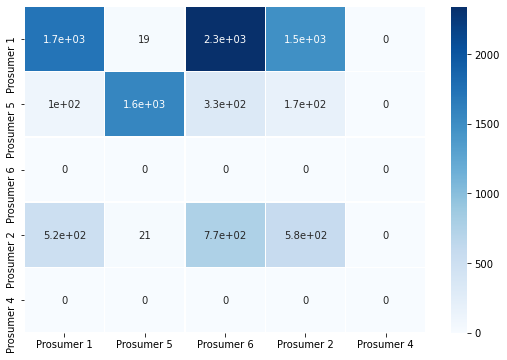

In [44]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(q_share_total, annot=True, cmap="Blues", linewidths=.5, ax=ax)

### Costs, emissions, etc for each prosumer

In [45]:
results = pd.DataFrame(index=prosumer)
for i in prosumer:
    results.loc[i,'buying grid'] = value(sum(model.q_grid_in[t,i] for t in time_steps))
    results.loc[i,'selling grid'] = value(sum(model.q_grid_out[t,i] for t in time_steps))
    results.loc[i,'battery charging'] = value(sum(model.q_bat_in[t,i] for t in time_steps))
    results.loc[i,'battery discharging'] = value(sum(model.q_bat_out[t,i] for t in time_steps))
    results.loc[i,'self-consumption'] = q_share_total.loc[i,i]
    results.loc[i,'buying community'] = sum(q_share_total.loc[j,i] for j in prosumer) - q_share_total.loc[i,i]
    results.loc[i,'selling community'] = sum(q_share_total.loc[i,j] for j in prosumer) - q_share_total.loc[i,i]
    results.loc[i,'emissions'] = value(sum(model.q_grid_in[t,i]*emissions.Emissions.loc[t]/1000 for t in time_steps))
    results.loc[i,'costs'] = value(-community_welfare[i]) - value(prosumer_welfare[i]) + value(prosumer_welfare2[i])  
results

,buying grid,selling grid,battery charging,battery discharging,self-consumption,buying community,selling community,emissions,costs
Prosumer 1,4286.312998,905.795027,0.000000,0.000000,1720.301029,620.945995,3834.589944,2302.657857,42.075223
Prosumer 5,2154.236910,4288.942329,0.000000,0.000000,1568.019973,39.820859,603.723697,1154.795610,126.581524
Prosumer 6,4266.838845,0.000000,0.000000,0.000000,0.000000,3433.297926,0.000000,2303.918457,1672.953038
Prosumer 2,1325.833038,2803.468901,1364.059937,1104.888549,580.128205,1647.965819,1303.716957,718.369608,243.826610
Prosumer 4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


## Initialize new status quo

In [49]:
results_old = results

In [50]:
prosumer_old = []
for i in prosumer:
    if value(model.b[i]) == 1:
        prosumer_old.append(i)

In [51]:
prosumer_old

['Prosumer 1', 'Prosumer 5', 'Prosumer 6', 'Prosumer 2']